$\Huge{ \text{Pricing multi-asset options using Copulas : }} \\$ 

$\Huge{\text{a hybrid Monte Carlo-Copula Approach}}$

<hr><b>
<hr><b>

$\huge{\text{BOUDCHICHI Oussama}}$

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas_datareader as web
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 8)
plt.rc('axes', labelsize = 15)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
root = os.getcwd()
PROJECT_ROOT = os.path.join(root, 'Figures')
os.makedirs(PROJECT_ROOT, exist_ok=True)
def save_fig(fig_id, tight_layout = True, fig_extention = 'pdf', resolution=300):
    path = os.path.join(PROJECT_ROOT, fig_id + '.' + fig_extention)
    print('Saving figure', fig_id, '\n\n')
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extention, dpi =resolution)

Sk = stats.skew
K = stats.kurtosis

In [2]:
SP = web.DataReader('^GSPC', 'yahoo', start='2017-01-01')['Adj Close']
DJI = web.DataReader('^DJI', 'yahoo', start='2017-01-01')['Adj Close']

In [4]:
SP.shape, DJI.shape

((1254,), (1254,))

In [3]:
lretSP= SP.pct_change().apply(lambda x: np.log(1 + x)).dropna()
lretDJI = DJI.pct_change().apply(lambda x: np.log(1 + x)).dropna()

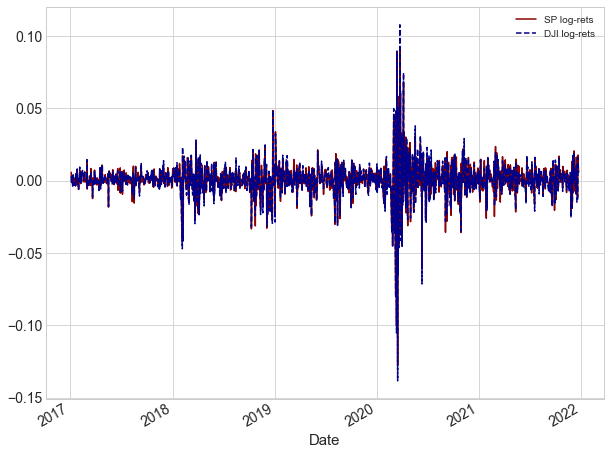

In [6]:
lretSP.plot(label='SP log-rets', color='darkred')
lretDJI.plot(label='DJI log-rets', color='darkblue', linestyle="dashed")
plt.legend()

In [4]:
Data = pd.DataFrame({'SP':lretSP, 'DJI':lretDJI})

In [8]:
Data.describe()

,SP,DJI
count,1253.000000,1253.000000
mean,0.000589,0.000473
std,0.012202,0.012780
min,-0.127652,-0.138418
25%,-0.002972,-0.003308
50%,0.000927,0.000869
75%,0.005706,0.005507
max,0.089683,0.107643


In [11]:
print('Skewness : ')
Data.apply(lambda x: Sk(x))

Skewness : 


SP    -1.144512
DJI   -1.180496
dtype: float64

In [13]:
print('Kurtosis : ')
Data.apply(lambda x: K(x))

Kurtosis : 


SP     21.871796
DJI    25.033372
dtype: float64

In [14]:
print('Excess-Kurtosis :')
Data.apply(lambda x: K(x)-3)

Excess-Kurtosis :


SP     18.871796
DJI    22.033372
dtype: float64

#### Normality test :


In [16]:
res = Data.apply(lambda x: stats.shapiro(x))
res.index = ['Statistic', 'p-value']
res

,SP,DJI
Statistic,7.918049e-01,7.739556e-01
p-value,2.872322e-37,2.033515e-38


In [5]:
from PyCopula import *

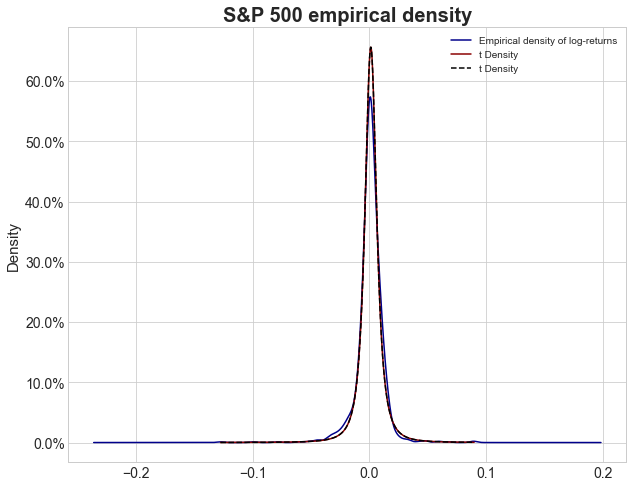

In [18]:
plotKDE(lretSP, ('t', 'nct'), 'S&P 500')

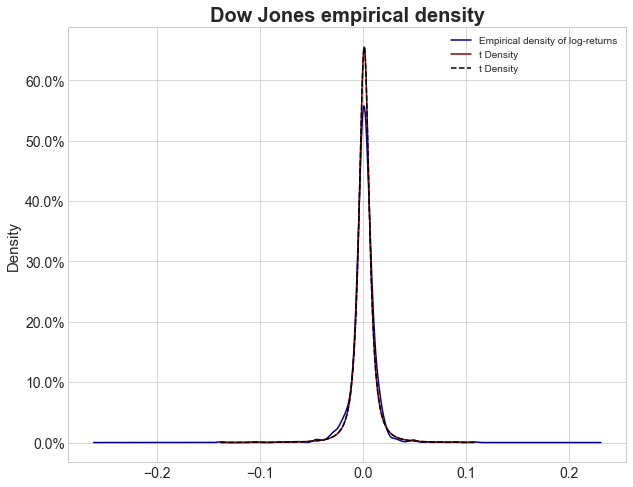

In [19]:
plotKDE(lretDJI, ('t', 'nct'), 'Dow Jones')

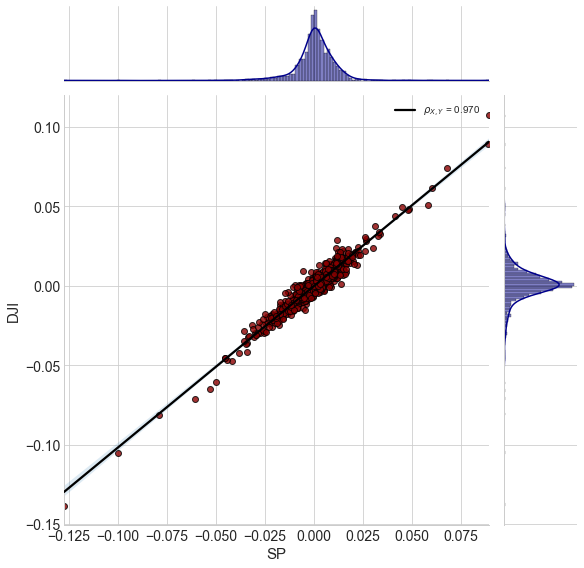

In [21]:
plotJoint(Data, 'SP', 'DJI')

### Fitting marginal dists

In [6]:
dist_fit(lretDJI)

Candidates :  ['t', 'nct', 'skewnorm', 'norminvgauss', 'cauchy']  .....
(PARAMS, p-value, AIC)


{'t': (1.992192439048377,
  0.0010204758106240113,
  0.005396483764049316,
  0.7018507711593089,
  0.019803035852475337,
  -8162.309900751448),
 'nct': (2.01948818056385,
  -0.12170733276466435,
  0.0017452910501124783,
  0.0054273969488250785,
  0.7749337141039725,
  0.01853983873133569,
  -8162.442917378253),
 'norminvgauss': (0.1943308400356708,
  -0.026300259460986634,
  0.0011972795041975506,
  0.0053097293259564,
  0.7811623169093486,
  0.0184282978545961,
  -8163.299452009365)}

In [7]:
dist_fit(lretSP)

Candidates :  ['t', 'nct', 'skewnorm', 'norminvgauss', 'cauchy']  .....
(PARAMS, p-value, AIC)


{'t': (2.06751434487789,
  0.001141939821913387,
  0.00540619370709325,
  0.12065578557296819,
  0.033338556755704185,
  -8209.628137127802),
 'nct': (2.113075378200998,
  -0.1239813515383612,
  0.0018862525833061926,
  0.0054594919563724295,
  0.13559990910733855,
  0.032634788389973246,
  -8209.696645810884),
 'norminvgauss': (0.21160828047985564,
  -0.027150717435285833,
  0.0012794822738193333,
  0.005333355270380926,
  0.1444905646021969,
  0.03224551111037721,
  -8211.322261181249)}

Text(0.5, 1.0, 'Dow Jones QQ-Plot')

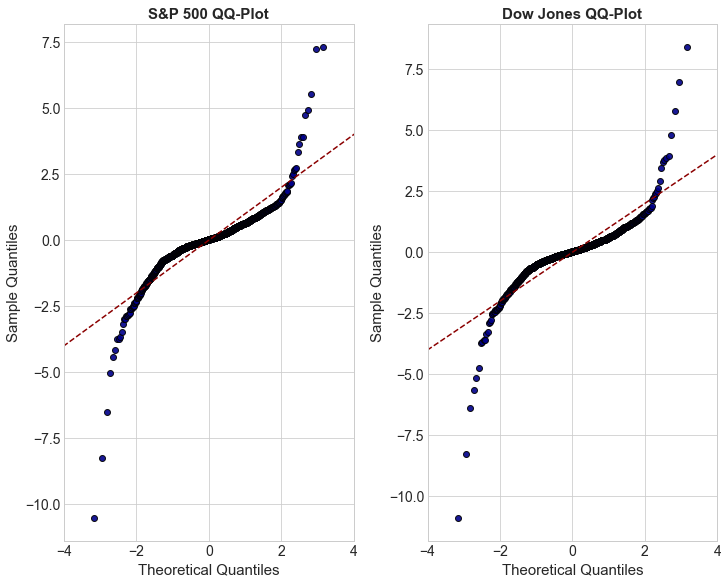

In [8]:
import statsmodels.api as sm
fig, axs = plt.subplots(1,2, constrained_layout=True, sharex=True)
pp1 = sm.ProbPlot(lretSP, fit = True)
qq1 = pp1.qqplot(marker='o', markerfacecolor='darkblue', markeredgecolor='k', alpha=0.9, ax=axs[0])
sm.qqline(qq1.axes[0], line='45', color='darkred', linestyle='dashed');

pp2 = sm.ProbPlot(lretDJI, fit = True)
qq2 = pp2.qqplot(marker='o', markerfacecolor='darkblue', markeredgecolor='k', alpha=0.9, ax=axs[1])
sm.qqline(qq2.axes[1], line='45', color='darkred', linestyle='dashed')
plt.xlim((-4,4))
axs[0].set_title('S&P 500 QQ-Plot', fontdict={'weight':'bold', 'size':15})
axs[1].set_title('Dow Jones QQ-Plot', fontdict={'weight':'bold', 'size':15})

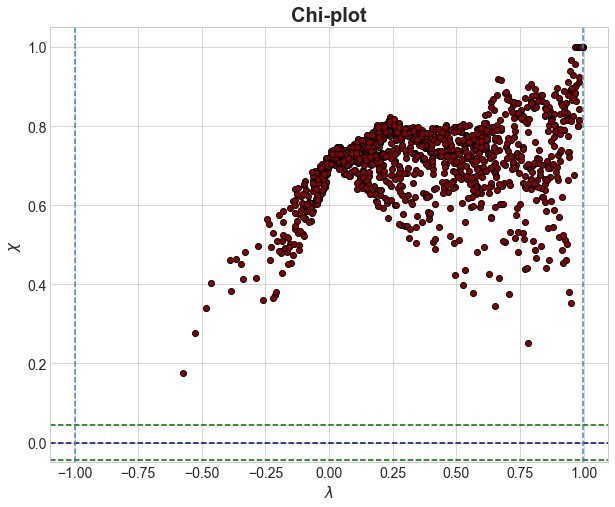

In [9]:
ChiPlot(lretSP, lretDJI)

Text(0.5, 1.0, 'K-Plot')

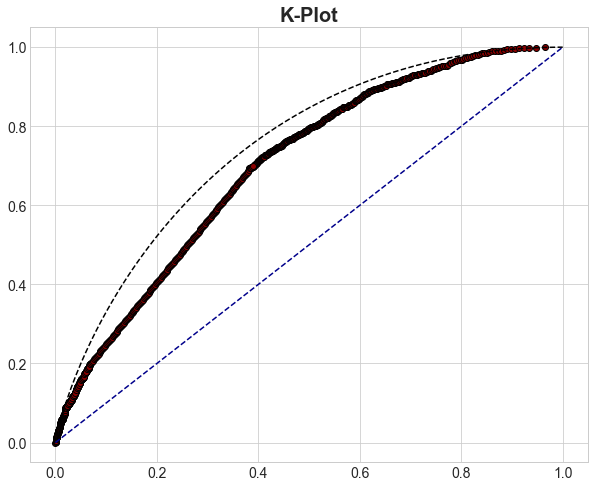

In [10]:
Kplot(lretSP, lretDJI, interp=True, interval = (0.02, 0.39), nobs=200)
plt.title('K-Plot', fontdict={'weight':'bold', 'size':20})

Text(0.5, 1.0, 'Rank-Rank Plot')

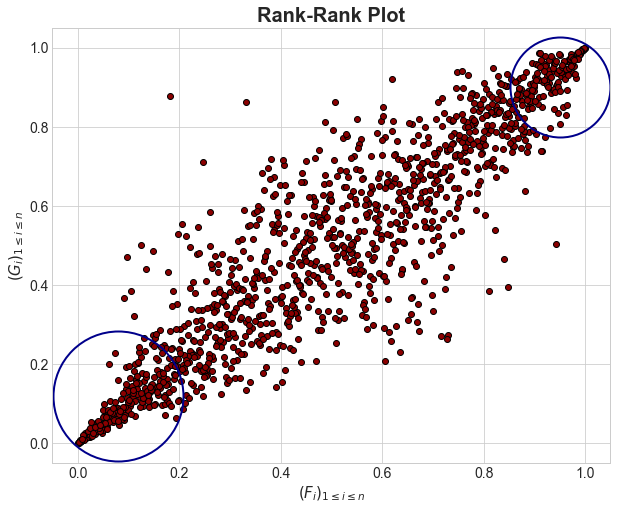

In [11]:
RankRankPlot(lretSP, lretDJI)
circle_rad1 = 65  
circle_rad2 = 50 

plt.plot(0.95, 0.9, 'o',
        ms=circle_rad2 * 2, mec='darkblue', mfc='none', mew=2)
plt.plot(0.08, 0.12, 'o',
        ms=circle_rad1 * 2, mec='darkblue', mfc='none', mew=2)
plt.title('Rank-Rank Plot', fontdict={'weight':'bold', 'size':20})

In [8]:
kd = JointEPDF(lretSP, lretDJI)
z_data = kd.iloc[:, 2:]
z = z_data.values
x, y = kd['x'], kd['y']
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='EPDF', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [23]:
set = [5]
fit = CopulaFit(lretDJI, lretSP, set)

Family
------ 
No:    5
Name:  Frank

Parameter(s)
------------
par:  14.76

Dependence measures
-------------------
Kendall's tau:    0.76 (empirical = 0.77, p value < 0.01)
Upper TD:         0 
Lower TD:         0 

Fit statistics
--------------
logLik:  1144.93 
AIC:    -2287.86 
BIC:    -2282.73 



In [6]:
from copulae import GumbelCopula

g_cop = GumbelCopula(dim = 2)  # initializing the copula
g_cop.fit(Data)

                SP          DJI
count  1253.000000  1253.000000
mean      0.500000     0.500000
std       0.288560     0.288560
min       0.000797     0.000797
25%       0.250399     0.250399
50%       0.500000     0.500000
75%       0.749601     0.749601
max       0.999203     0.999203


In [7]:
print('Family : Gumbel')
print('----------------------------------------\n Results : ')
print('----------------------------------------')
print('theta : ', g_cop._theta, " ; Kendall's tau : ", g_cop.tau, ' ; Upper tail dep : ', 2 - 2 ** (1 /g_cop._theta ), 'Lower tail dep : ', 0.)

Family : Gumbel
----------------------------------------
 Results : 
----------------------------------------
theta :  4.207478942010995  ; Kendall's tau :  0.7623279845764259  ; Upper tail dep :  0.8209114940603219 Lower tail dep :  0.0


In [10]:
GOFstatistic(lretSP, lretDJI, 'Frank', '14.76', 'K-S')

0.030376827880095665

In [6]:
CopulaMC

<function PyCopula.CopulaMC(N, S_0, K, days, r, omega, copula, copPar, marginal, margPar)>

In [7]:
N = 1000
S_0 = 1000
K = 1000
days = 1252
r = .025
omega = np.array([0.5, 0.5])
copula = 4
copPar = 14.76
marginal = 'nct'
margPar = (2.11, -1.04)

In [8]:
CopulaMC(N, S_0, K, days, r, omega, copula, copPar, marginal, margPar)

0.0